In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file and checking what are all the columns in the dataset

df = pd.read_csv("E:/downloads/train.csv")
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# shape

In [3]:
# let's check the shape of the dataset

print(f'In this dataset total rows = {df.shape[0]} and total columns = {df.shape[1]}')

In this dataset total rows = 45211 and total columns = 11


# DATA CLEANING

# missing values

In [4]:
# let's check whether there is any missing values present in the dataset
# here itself let's check the dtypes of the columns

warnings.simplefilter(action='ignore',category=FutureWarning)

col_info = pd.DataFrame(df.dtypes).T.rename(index = {0:'Column Types'})

col_info = col_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0:'Null Values'}))

col_info = col_info.append(pd.DataFrame((df.isnull().sum())/len(df)).T.rename(index = {0:'Null Values (%)'}))
col_info

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
Column Types,int64,object,object,object,object,int64,object,int64,int64,object,object
Null Values,0,0,0,0,0,0,0,0,0,0,0
Null Values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
num_var = df[['age', 'day', 'dur', 'num_calls']]
cat_var = df[['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome']]

# duplicates

In [6]:
# now let's check is there is any dublicates 

df.duplicated().sum()

6

In [7]:
# let's drop the dublicates from the datasets

df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
# let's check the count of dtypes

pd.DataFrame(df.dtypes.value_counts()).T

,object,int64
0,7,4


# misspelled words

In [9]:
print("UNIQUE CATEGORIES OF COLUMN ---> JOB \n")
print(df['job'].unique())

UNIQUE CATEGORIES OF COLUMN ---> JOB 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [10]:
print("UNIQUE CATEGORIES OF COLUMN ---> MARITAL STATUS \n")
print(df['marital'].unique())

UNIQUE CATEGORIES OF COLUMN ---> MARITAL STATUS 

['married' 'single' 'divorced']


In [11]:
print("UNIQUE CATEGORIES OF COLUMN ---> EDUCATION QUALIFICATION \n")
print(df['education_qual'].unique())

UNIQUE CATEGORIES OF COLUMN ---> EDUCATION QUALIFICATION 

['tertiary' 'secondary' 'unknown' 'primary']


In [12]:
print("UNIQUE CATEGORIES OF COLUMN ---> CALL TYPE \n")
print(df['call_type'].unique())

UNIQUE CATEGORIES OF COLUMN ---> CALL TYPE 

['unknown' 'cellular' 'telephone']


In [13]:
print("UNIQUE CATEGORIES OF COLUMN ---> MONTH \n")
print(df['mon'].unique())

UNIQUE CATEGORIES OF COLUMN ---> MONTH 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [14]:
print("UNIQUE CATEGORIES OF COLUMN ---> PREVIOUS OUTCOME \n")
print(df['prev_outcome'].unique())

UNIQUE CATEGORIES OF COLUMN ---> PREVIOUS OUTCOME 

['unknown' 'failure' 'other' 'success']


In [15]:
print("UNIQUE CATEGORIES OF COLUMN ---> TARGET VARIABLE y \n")
print(df['y'].value_counts())

UNIQUE CATEGORIES OF COLUMN ---> TARGET VARIABLE y 

no     39916
yes     5289
Name: y, dtype: int64


In [16]:
print("percentage of no : ","{:.2f}".format(39916/(39916+5289)*100),'%')
print("percentage of yes : ","{:.2f}".format(5289/(39916+5289)*100),'%')

percentage of no :  88.30 %
percentage of yes :  11.70 %


In [17]:
# let's change the categorical value to numerical for target data

df['target'] = df['y'].map({'yes':1,'no':0})
del df['y']

In [18]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [19]:
df.describe()

,age,day,dur,num_calls,target
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


# outliers

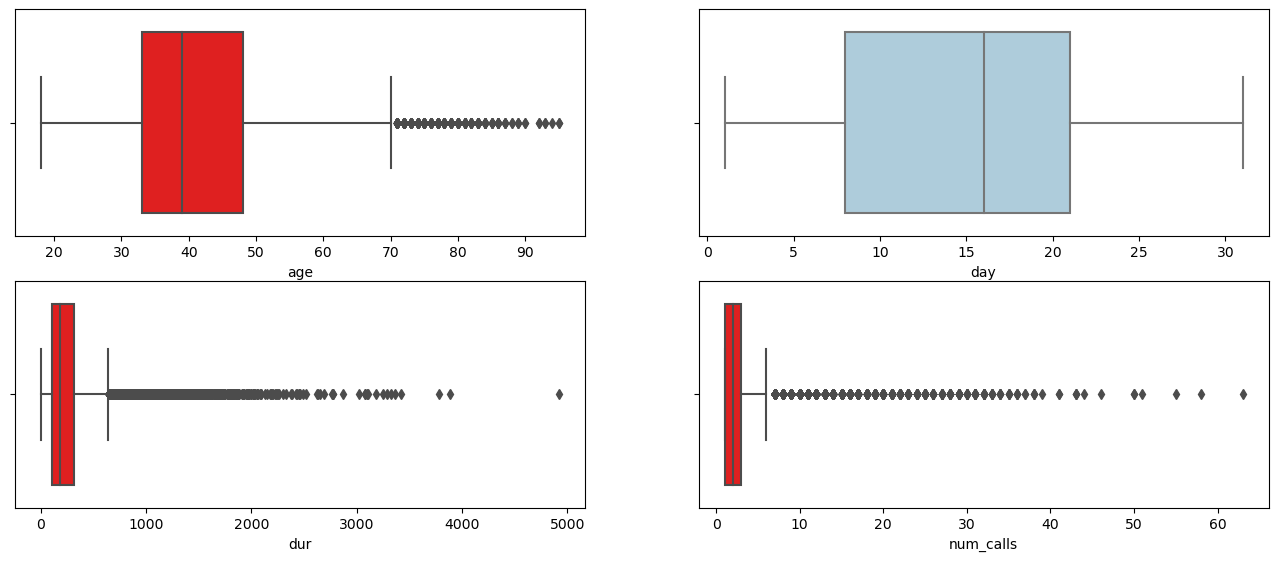

<Figure size 640x480 with 0 Axes>

In [20]:
# outliers detection and clip/strip

plt.figure(figsize=(25,10))
plt.subplot(331)
sns.boxplot(df['age'], color='red')

plt.subplot(332)
sns.boxplot(df['day'], palette='Paired')

plt.subplot(334)
sns.boxplot(df['dur'], color='red')

plt.subplot(335)
sns.boxplot(df['num_calls'], color='red')

plt.show()
plt.tight_layout()

In [21]:
# here it seems except day all three numerical datas having outliers
outliers = []
q1,q3 = np.percentile(df['age'],[25,75])
iqr = q3-q1
ul = q3 + 1.5*iqr                              # setting upper limit
ll = q1 - 1.5*iqr                              # setting lower limit
for i in df['age']:
    if i>ul or i<ll:
        outliers.append(i)
print(f'lower_limit = {ll} and upper_limit = {ul}')
print(f'Total outliers in the column age is ----> {len(outliers)} \n')

outliers = []
q1,q3 = np.percentile(df['dur'],[25,75])
iqr = q3-q1
ul = q3 + 1.5*iqr                              # setting upper limit
ll = q1 - 1.5*iqr                              # setting lower limit
for i in df['dur']:
    if i>ul or i<ll:
        outliers.append(i)
print(f'lower_limit = {ll} and upper_limit = {ul}')
print(f'Total outliers in the column dur is ----> {len(outliers)} \n')

outliers = []
q1,q3 = np.percentile(df['num_calls'],[25,75])
iqr = q3-q1
ul = q3 + 1.5*iqr                              # setting upper limit
ll = q1 - 1.5*iqr                              # setting lower limit
for i in df['num_calls']:
    if i>ul or i<ll:
        outliers.append(i)
print(f'lower_limit = {ll} and upper_limit = {ul}') 
print(f'Total outliers in the column num_calls is ----> {len(outliers)} \n')

outliers = []
q1,q3 = np.percentile(df['day'],[25,75])
iqr = q3-q1
ul = q3 + 1.5*iqr                              # setting upper limit
ll = q1 - 1.5*iqr                              # setting lower limit
for i in df['day']:
    if i>ul or i<ll:
        outliers.append(i)
print(f'Total outliers in the column day is ----> {len(outliers)} \n')

lower_limit = 10.5 and upper_limit = 70.5
Total outliers in the column age is ----> 487 

lower_limit = -221.0 and upper_limit = 643.0
Total outliers in the column dur is ----> 3235 

lower_limit = -2.0 and upper_limit = 6.0
Total outliers in the column num_calls is ----> 3064 

Total outliers in the column day is ----> 0 



In [22]:
#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.age = df.age.clip(10.5,70.5)

#removing outlier for dur column
df.dur = df.dur.clip(-221,643)

#removing outlier for num_calls column
df.num_calls = df.num_calls.clip(-2,6)

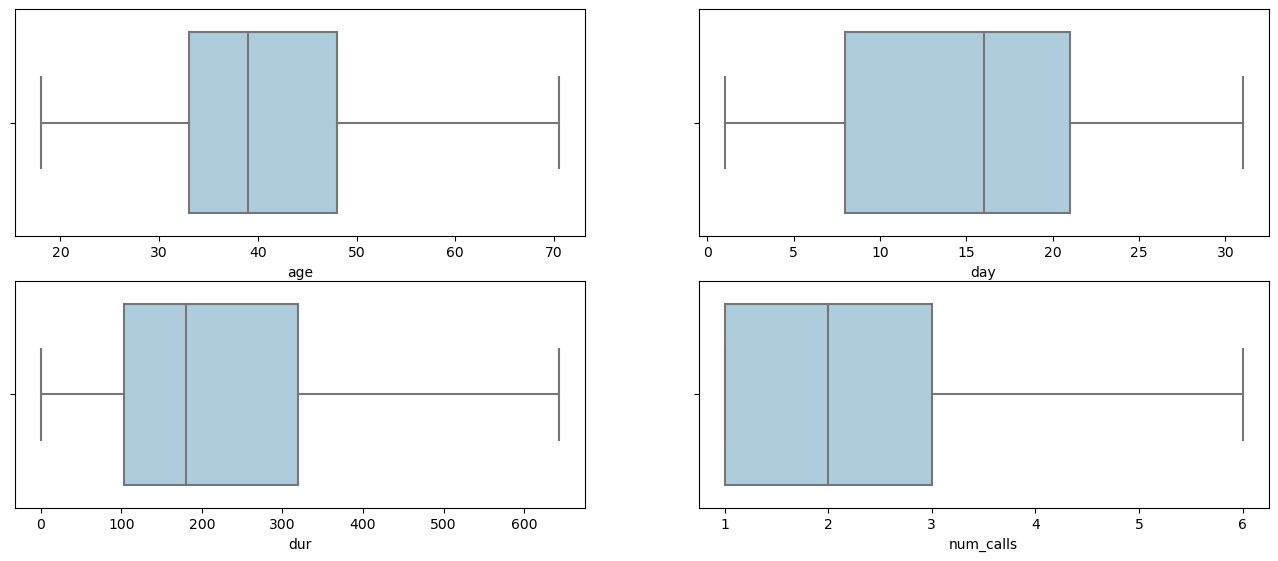

<Figure size 640x480 with 0 Axes>

In [23]:
# After deletion of outliers

plt.figure(figsize=(25,10))
plt.subplot(331)
sns.boxplot(df['age'], palette='Paired')

plt.subplot(332)
sns.boxplot(df['day'], palette='Paired')

plt.subplot(334)
sns.boxplot(df['dur'], palette='Paired')

plt.subplot(335)
sns.boxplot(df['num_calls'], palette='Paired')

plt.show()
plt.tight_layout()

# EDA

# DISTRIBUTION OF CATEGORICAL FEATURES

In [24]:
cat_var.columns

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')

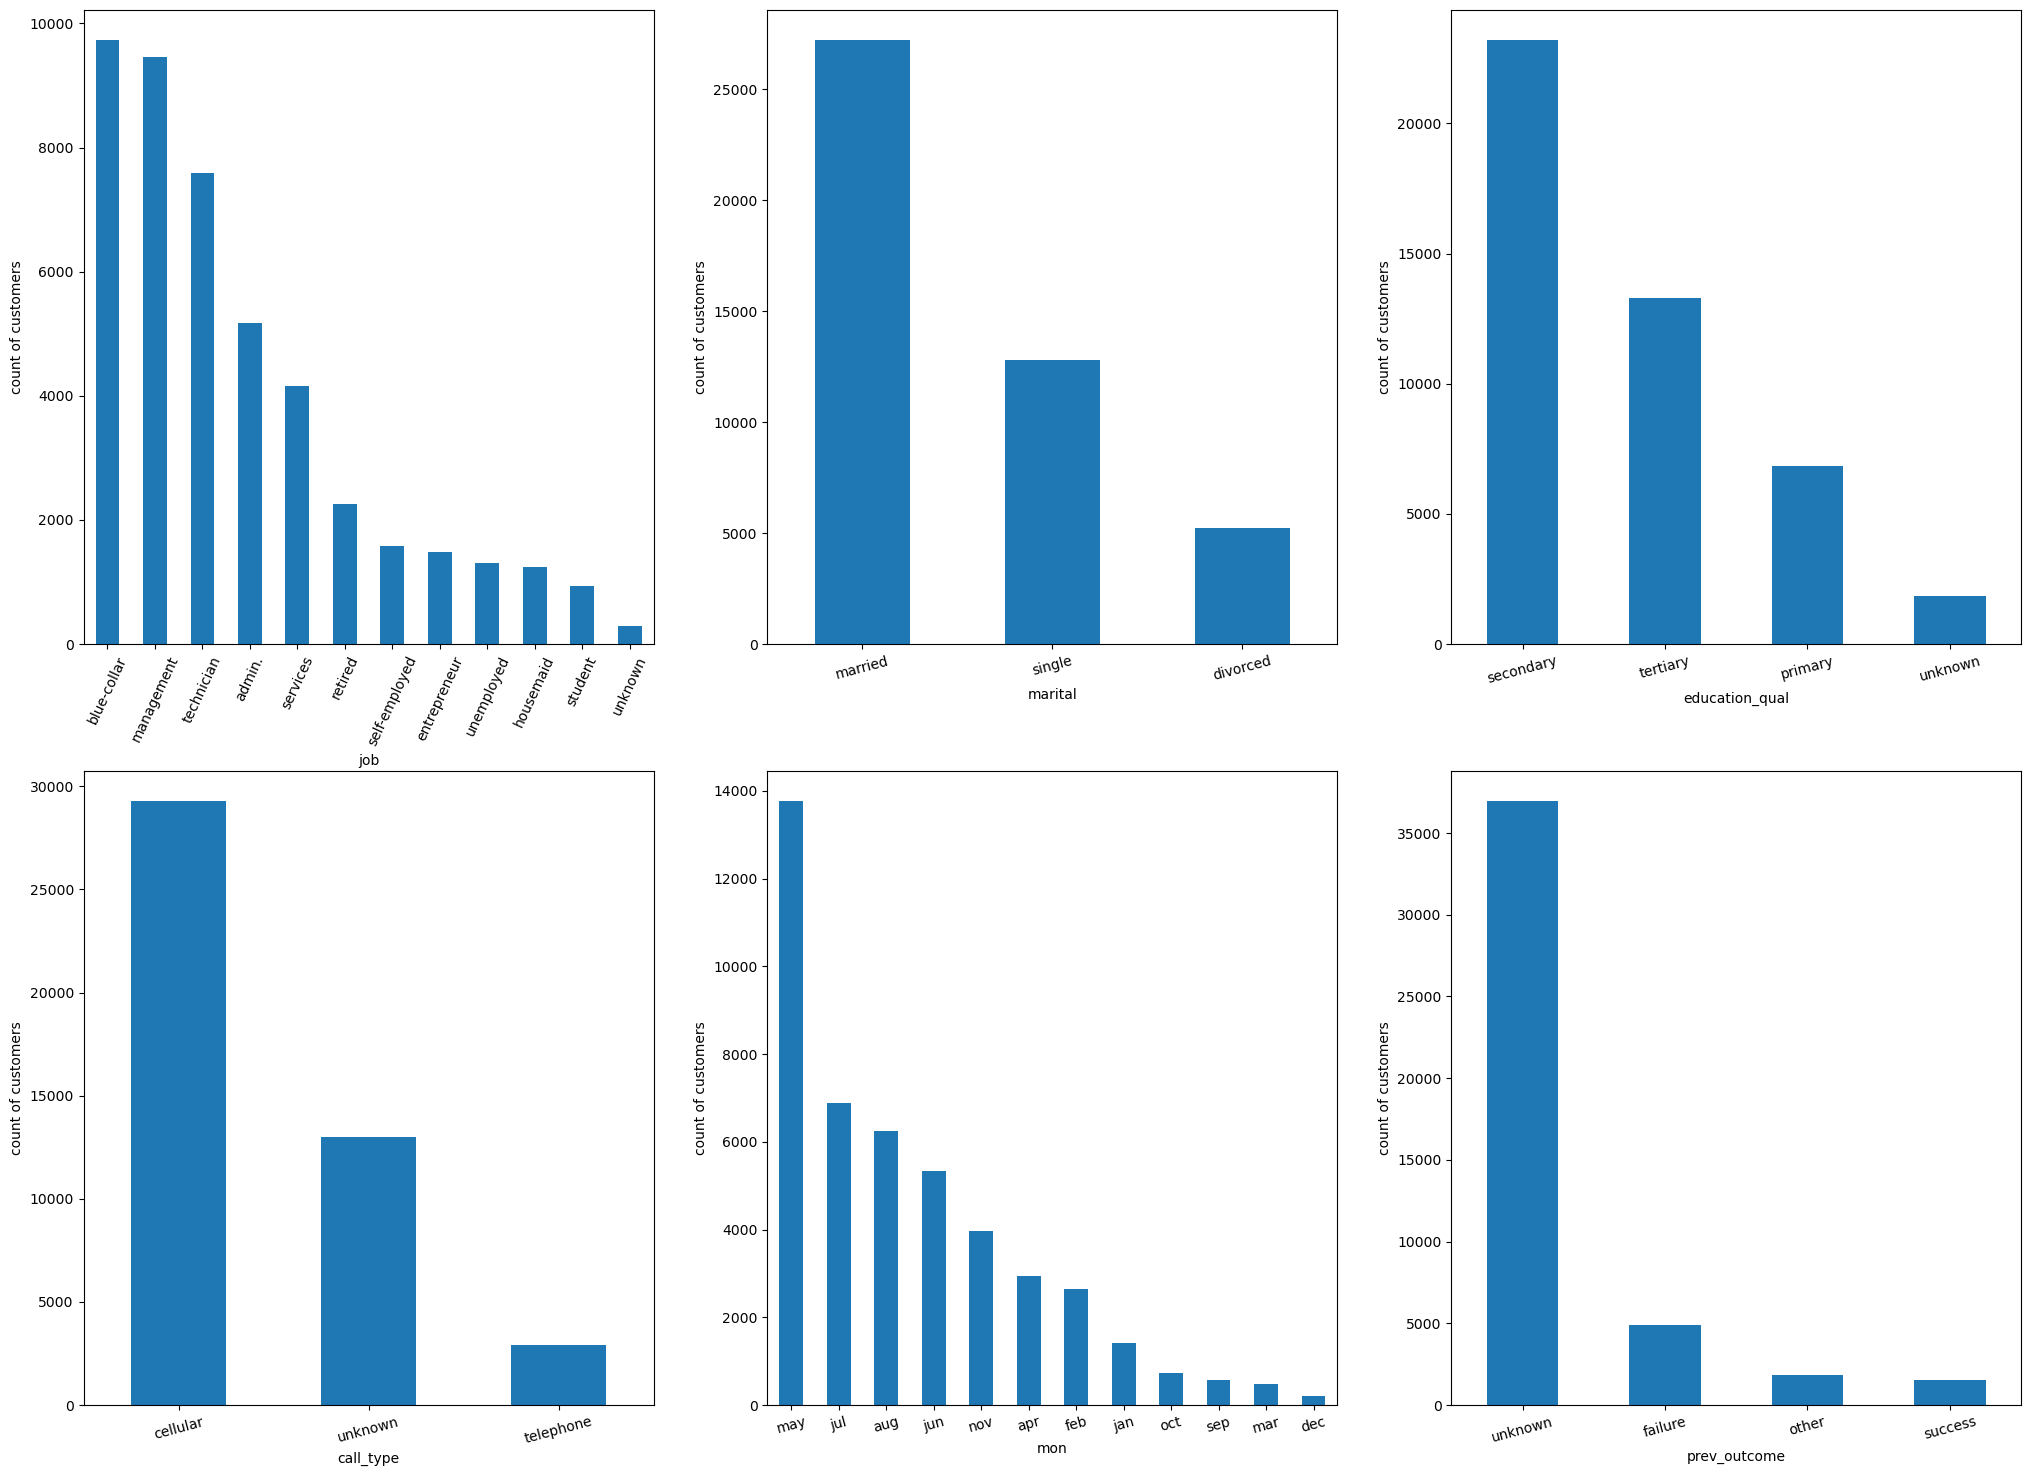

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(25,28))

plt.subplot(331)
df['job'].value_counts().plot(kind='bar')
plt.xticks(rotation=65)
plt.xlabel('job')
plt.ylabel('count of customers')

plt.subplot(332)
df['marital'].value_counts().plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('marital')
plt.ylabel('count of customers')

plt.subplot(333)
df['education_qual'].value_counts().plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('count of customers')

plt.subplot(334)
df['call_type'].value_counts().plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('call_type')
plt.ylabel('count of customers')

plt.subplot(335)
df['mon'].value_counts().plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('count of customers')

plt.subplot(336)
df['prev_outcome'].value_counts().plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('prev_outcome')
plt.ylabel('count of customers')

plt.show()
plt.tight_layout()

In [26]:
# let's check the percent of unknown category present in the columns

job_unknown = round((len(df[df['job']=='unknown']) / len(df)) * 100,1)
print(f'The percent of unknown in job is            ---> {job_unknown}\n')

education_qual_unknown = round((len(df[df['education_qual']=='unknown']) / len(df)) * 100,1)
print(f'The percent of unknown in education_qual is ---> {education_qual_unknown}\n')

call_type_unknown = round((len(df[df['call_type']=='unknown']) / len(df)) * 100,1)
print(f'The percent of unknown in call_type job is  ---> {call_type_unknown}')


The percent of unknown in job is            ---> 0.6

The percent of unknown in education_qual is ---> 4.1

The percent of unknown in call_type job is  ---> 28.8


In [27]:
# here in the column job and education_qual the percent of unknown is low so we can change it by using mode

df.loc[df['job'] == 'unknown', 'job'] = df['job'].mode()[0]
df.loc[df['education_qual'] == 'unknown','education_qual'] =df['education_qual'].mode()[0]

# DISTRIBUTION OF NUMERICAL FEATURES

In [28]:
num_var.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

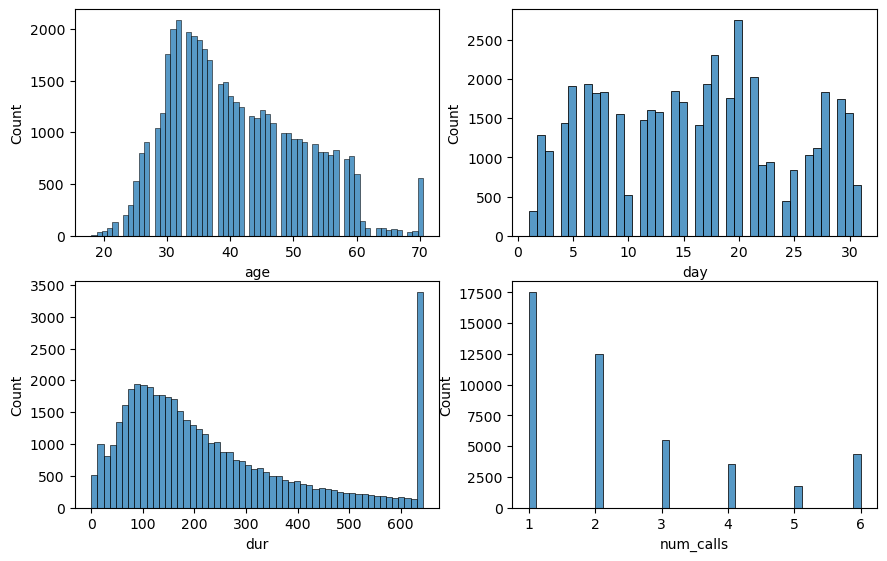

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(16,10))

plt.subplot(331)
sns.histplot(df['age'])

plt.subplot(332)
sns.histplot(df['day'])

plt.subplot(334)
sns.histplot(df['dur'])

plt.subplot(335)
sns.histplot(df['num_calls'])

plt.show()
plt.tight_layout()

# PLOTTING THE DISTRIBUTION OF CATEGORICAL FEATURES VS TARGET

In [30]:
cat_var.columns

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')

In [31]:
job_order = df.groupby('job')['target'].mean().reset_index().sort_values('target')['job']
marital_order = df.groupby('marital')['target'].mean().reset_index().sort_values('target')['marital']
education_qual_order = df.groupby('education_qual')['target'].mean().reset_index().sort_values('target')['education_qual']
call_type_order = df.groupby('call_type')['target'].mean().reset_index().sort_values('target')['call_type']
mon_order = df.groupby('mon')['target'].mean().reset_index().sort_values('target')['mon']
prev_outcome_order = df.groupby('prev_outcome')['target'].mean().reset_index().sort_values('target')['prev_outcome']

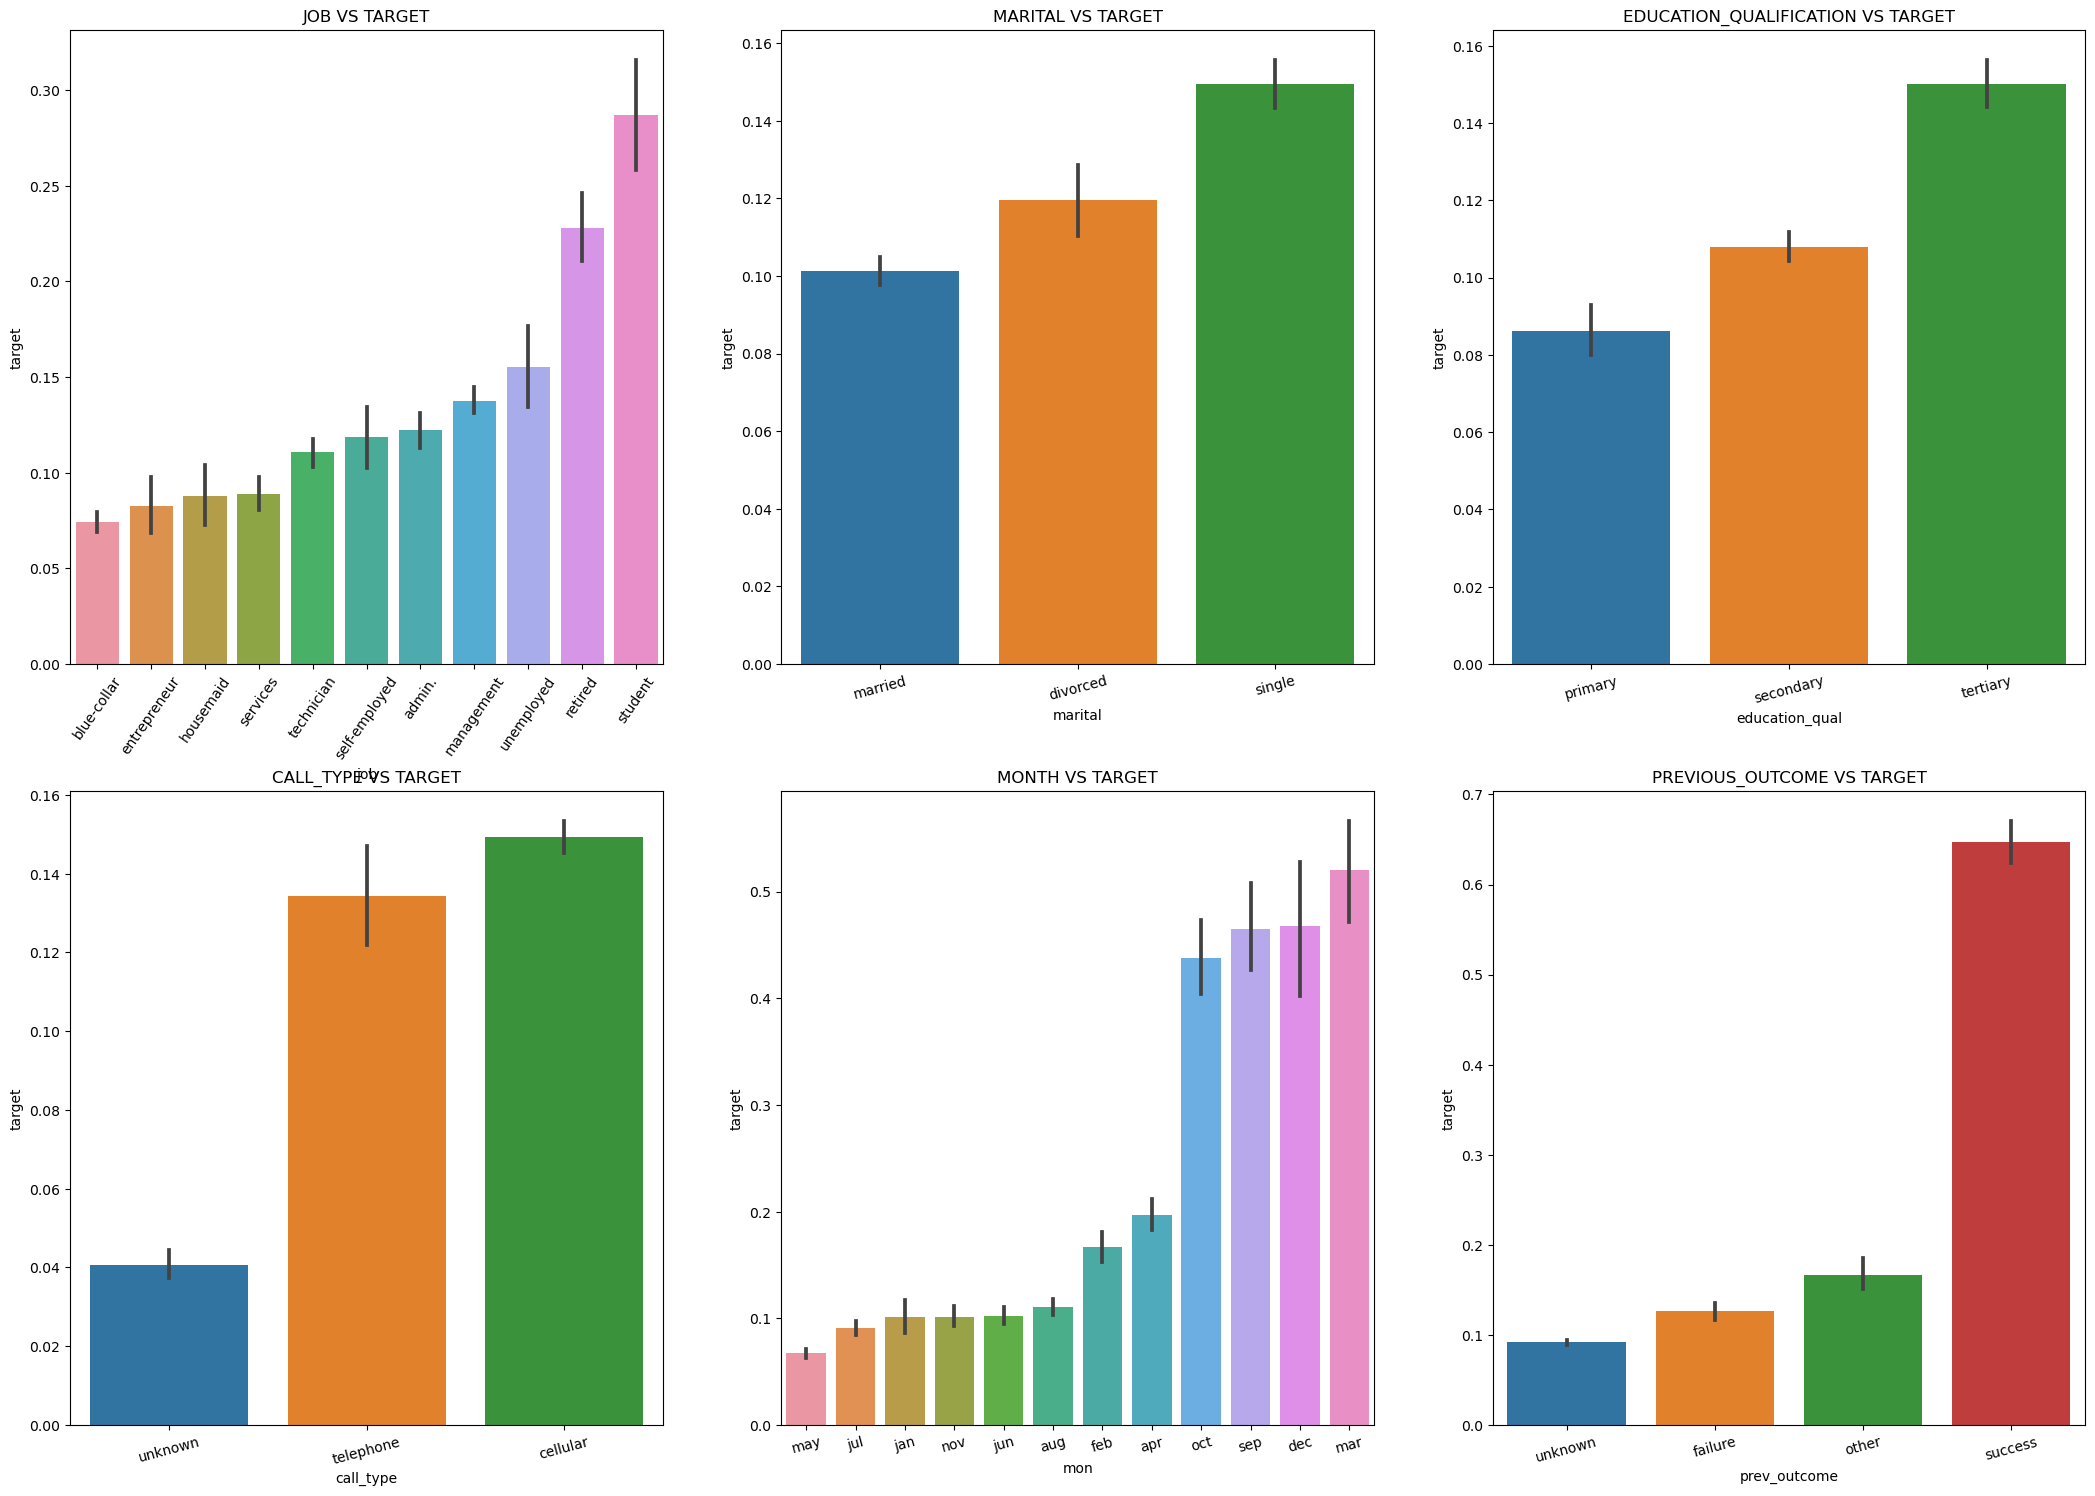

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(26,28))

plt.subplot(331)
sns.barplot(df['job'],df['target'],order=job_order)
plt.xticks(rotation=55)
plt.title('JOB VS TARGET')

plt.subplot(332)
sns.barplot(df['marital'],df['target'],order=marital_order)
plt.xticks(rotation=15)
plt.title('MARITAL VS TARGET')

plt.subplot(333)
sns.barplot(df['education_qual'],df['target'],order=education_qual_order)
plt.xticks(rotation=15)
plt.title('EDUCATION_QUALIFICATION VS TARGET')

plt.subplot(334)
sns.barplot(df['call_type'],df['target'],order=call_type_order)
plt.xticks(rotation=15)
plt.title('CALL_TYPE VS TARGET')

plt.subplot(335)
sns.barplot(df['mon'],df['target'],order=mon_order)
plt.xticks(rotation=15)
plt.title('MONTH VS TARGET')

plt.subplot(336)
sns.barplot(df['prev_outcome'],df['target'],order=prev_outcome_order)
plt.xticks(rotation=15)
plt.title('PREVIOUS_OUTCOME VS TARGET')

plt.show()
plt.tight_layout()

# PLOTTING THE DISTRIBUTION OF NUMERICAL FEATURES VS TARGET

In [33]:
num_var.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

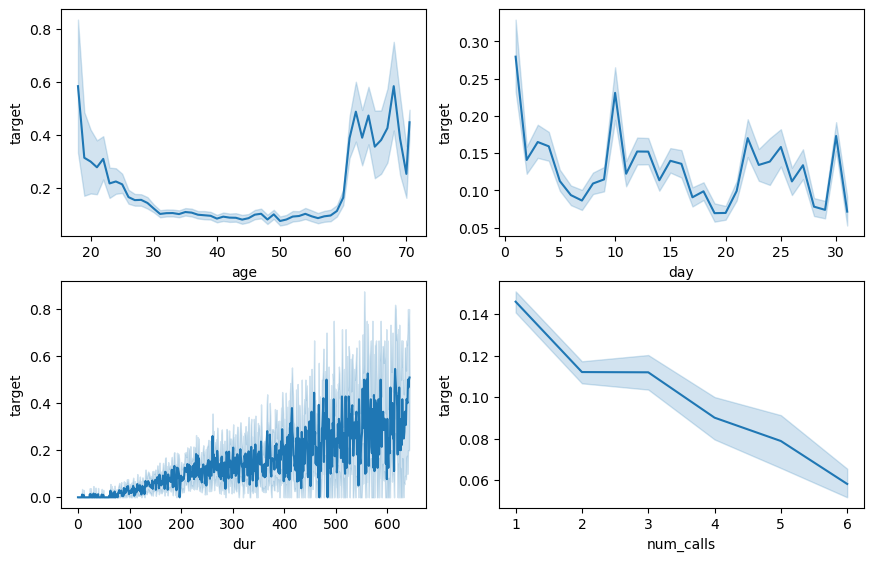

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(16,10))

plt.subplot(331)
sns.lineplot(df['age'], df['target'])

plt.subplot(332)
sns.lineplot(df['day'], df['target'])

plt.subplot(334)
sns.lineplot(df['dur'], df['target'])

plt.subplot(335)
sns.lineplot(df['num_calls'], df['target'])

plt.show()
plt.tight_layout()

In [35]:
# let's check the correlation

def correlation(x):
    corr = df[[x,'target']].corr()
    corr_value = corr.iloc[0,1]
    print(corr_value)
    if corr_value>0.2 or corr_value<-0.2:
        print(f"The relationship between {x} and target is LINEAR \n")
    else:
        print(f"No LINEAR relationship between {x} and target \n")
    

In [36]:
correlation('age')
correlation('day')
correlation('dur')
correlation('num_calls')


0.018945938418744184
No LINEAR relationship between age and target 

-0.02837053254167087
No LINEAR relationship between day and target 

0.39064240530658856
The relationship between dur and target is LINEAR 

-0.08406711992206903
No LINEAR relationship between num_calls and target 



In [37]:
def transformation(x):
    df['transformed_data'] = np.log(df[x])            # square, cube, square root, exponential, log
    corr = df[[x,'target']].corr()
    corr_value = corr.iloc[0,1]
    print(corr_value)
    if corr_value>0.2 or corr_value<-0.2:
        print(f"The relationship between {x} and target is LINEAR \n")
    else:
        print(f"No LINEAR relationship between {x} and target \n")    
    

In [38]:
transformation('age')
transformation('day')
transformation('num_calls')


0.018945938418744184
No LINEAR relationship between age and target 

-0.02837053254167087
No LINEAR relationship between day and target 

-0.08406711992206903
No LINEAR relationship between num_calls and target 



In [39]:
del df['transformed_data']

## Encoding

In [40]:
# LABEL encoding

df['marital'] = df['marital'].map({'married':0, 'divorced':1, 'single':2})
df['education_qual'] = df['education_qual'].map({'primary':0, 'secondary':1, 'tertiary':2})

# ONE_HOT encoding

df = pd.get_dummies(df,columns=['call_type', 'mon', 'prev_outcome', 'job'])

In [41]:
df.head()

,age,marital,education_qual,day,dur,num_calls,target,call_type_cellular,call_type_telephone,call_type_unknown,mon_apr,mon_aug,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58.0,0,2,5,261,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,44.0,2,1,5,151,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,33.0,0,1,5,76,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,47.0,0,1,5,92,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,33.0,2,1,5,198,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


# Splitting for traing and testing

In [44]:

from sklearn.model_selection import train_test_split

x = df.drop('target',axis = 1).values
y = df['target'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


## Balancing

In [47]:

from imblearn.combine import SMOTEENN              

smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [48]:
print(len(x_train_smt))
print(len(y_train_smt))

52197
52197


# MODELS

## Logistic regression

In [78]:

warnings.filterwarnings(action='ignore',category=ConvergenceWarning)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_smt, y_train_smt)
y_pred = lr.predict_proba(x_test)
y_pred

array([[0.31276665, 0.68723335],
       [0.92844343, 0.07155657],
       [0.92509855, 0.07490145],
       ...,
       [0.02159875, 0.97840125],
       [0.93960341, 0.06039659],
       [0.19358171, 0.80641829]])

In [77]:
# cross value score for lr

from sklearn.model_selection import cross_val_score
lr_cv_score = cross_val_score(lr, x_train_smt, y_train_smt, cv=10).mean()
print("CV score for logistic regression model :",lr_cv_score)

CV score for logistic regression model : 0.889974731290547


In [50]:

from sklearn.metrics import f1_score, roc_auc_score
# let's find the f1 score

y_pred_labels = (y_pred[:,1]>0.5).astype(int)
lr_f1_score = f1_score(y_test, y_pred_labels)
print("F1 score for logistic regression model :",lr_f1_score)

F1 score for logistic regression model : 0.47


In [51]:
# auroc score

lr_auroc_score = roc_auc_score(y_test, y_pred_labels)
print("AUROC score for logistic regression model :",lr_auroc_score)

AUROC score for logistic regression model : 0.81


## KNN

In [ ]:
# in this model it's mandatory to scale the data.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

standardscalar = StandardScaler()
standardscalar.fit(x_train_smt)
x_train_scaled = standardscalar.transform(x_train_smt)
x_test_scaled = standardscalar.transform(x_test)

knn_values = np.arange(1,20)
knn_cross_value = []
for k in knn_values:
    knn_class = KNeighborsClassifier(n_neighbors=k)
    knn_class.fit(x_train_scaled, y_train_smt)
    knn_score = knn_class.score(x_train_scaled, y_train_smt)
    cv_score = cross_val_score(knn_class, x_train_scaled, y_train_smt,cv=10).mean()
    result = {
        'k_value':k,
        'train_score':knn_score,
        'cross_val_score':cv_score
    }
    knn_cross_value.append(result)
m1 = pd.DataFrame(knn_cross_value)   

In [102]:
m1

,k_value,train_score,cross_val_score
0,1,1.000000,0.968926
1,2,0.993735,0.958408
2,3,0.978830,0.957067
3,4,0.975554,0.950094
4,5,0.968159,0.948292
5,6,0.963638,0.943426
6,7,0.959346,0.943560
7,8,0.955400,0.938790
8,9,0.953867,0.939269
9,10,0.950170,0.934729


In [103]:
best_row = m1.loc[m1['cross_val_score'].idxmax()]
knn_cv_score = best_row['cross_val_score']
print("Best K value is :",int(best_row['k_value']),"      Corresponding cross value score is :",knn_cv_score)

Best K value is : 1       Corresponding cross value score is : 0.968925764172905


In [104]:

# f1 score for knn model

y_pred = knn_class.predict(x_test_scaled)
knn_f1_score = f1_score(y_test, y_pred)
print("F1 score for KNN classification model :",knn_f1_score)

F1 score for KNN classification model : 0.5221295702373316


In [105]:

# auroc score for knn model

y_pred = knn_class.predict(x_test_scaled)
knn_auroc_score = roc_auc_score(y_test, y_pred)
print("AUROC score for KNN classification model :",knn_auroc_score)

AUROC score for KNN classification model : 0.7982141720288964


## Decision tree

In [63]:

from sklearn.tree import DecisionTreeClassifier

dt_cross_value = []
for depth in range(1,30):
    dt_class = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_class.fit(x_train_smt, y_train_smt)
    dt_score = dt_class.score(x_train_smt, y_train_smt)
    cv_score = cross_val_score(dt_class, x_train_smt, y_train_smt, cv=10).mean()
    result = {'depth':depth,
             'train_score':dt_score,
             'cross_value_score':cv_score}
    dt_cross_value.append(result)
m2 = pd.DataFrame(dt_cross_value)

In [93]:
m2

,depth,train_score,cross_value_score
0,1,0.794356,0.794165
1,2,0.846275,0.843727
2,3,0.878748,0.877579
3,4,0.885990,0.884208
4,5,0.902293,0.899324
5,6,0.922639,0.917295
6,7,0.938445,0.932104
7,8,0.953311,0.944308
8,9,0.958963,0.946818
9,10,0.966837,0.951129


In [95]:
best_row = m2.loc[m2['cross_value_score'].idxmax()]
dt_cv_score = best_row['cross_value_score']
print("Best depth value is :",int(best_row['depth']),"      Corresponding cross value score is :",dt_cv_score)

Best depth value is : 13       Corresponding cross value score is : 0.9573742859680845


In [96]:

# f1 score for DT

y_pred = dt_class.predict(x_test)
dt_f1_score = f1_score(y_test, y_pred)
print("F1 score for DT classification model :",dt_f1_score)

F1 score for DT classification model : 0.541913043478261


In [97]:

# auroc score for knn model

y_pred = dt_class.predict(x_test)
dt_auroc_score = roc_auc_score(y_test, y_pred)
print("AUROC score for DT classification model :",dt_auroc_score)

AUROC score for DT classification model : 0.7951735302050091


## Random forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier

## cross value score

In [98]:

# Cross Value Score For All Models

print('Cross Value Score For Logistic Regression model      :',lr_cv_score)
print('Cross Value Score For KNN Classification model       :',knn_cv_score)
print('Cross Value Score For DT Classification model        :',dt_cv_score)
print('Cross Value Score For RF Classification model        :',rf_cv_score)
print('Cross Value Score For XGBOOST Classification model   :',xg_cv_score)

Cross Value Score For Logistic Regression model : 0.889974731290547
Cross Value Score For KNN Classification model  : 0.968925764172905
Cross Value Score For DT Classification model   : 0.9573742859680845


## F1 score

In [99]:

# F1 score for all models

print("F1 score for logistic regression model      :",lr_f1_score)
print("F1 score for KNN Classification model       :",knn_f1_score)
print("F1 score for DT Classification model        :",dt_f1_score)
print('F1 Score For RF Classification model        :',rf_f1_score)
print('F1 Score For XGBOOST Classification model   :',xg_f1_score)

F1 score for logistic regression model : 0.47
F1 score for KNN Classification model  : 0.5221295702373316
F1 score for DT Classification model   : 0.541913043478261


## AUROC score

In [106]:

# auroc score for all models

print("AUROC score for logistic regression model      :",lr_auroc_score)
print("AUROC score for KNN Classification model       :",knn_auroc_score)
print("AUROC score for DT Classification model        :",dt_auroc_score)
print('AUROC Score For RF Classification model        :',rf_auroc_score)
print('AUROC Score For XGBOOST Classification model   :',xg_auroc_score)

AUROC score for logistic regression model : 0.81
AUROC score for KNN Classification model  : 0.7982141720288964
AUROC score for DT Classification model   : 0.7951735302050091
